In [35]:
import heapq
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [36]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


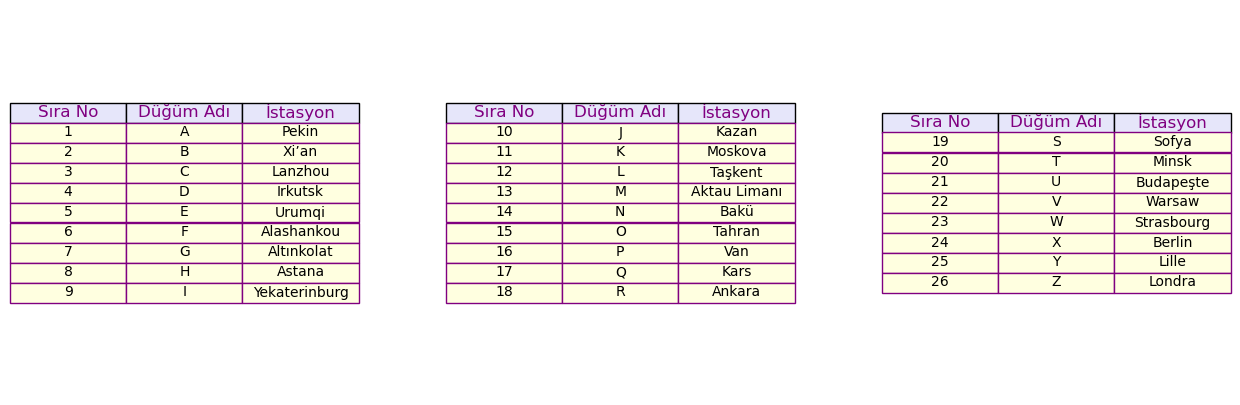

In [37]:
dugumler_1 = [
    (1,'A', 'Pekin'), (2,'B', 'Xi’an'), (3,'C', 'Lanzhou'), (4,'D', 'Irkutsk'), (5,'E', 'Urumqi'),
    (6,'F', 'Alashankou'), (7,'G', 'Altınkolat'), (8,'H', 'Astana'),(9,'I', 'Yekaterinburg')
]

dugumler_2 = [
    (10,'J', 'Kazan'),(11,'K', 'Moskova'), (12,'L', 'Taşkent'),(13,'M', 'Aktau Limanı'),
    (14,'N', 'Bakü'), (15,'O', 'Tahran'), (16,'P', 'Van'),(17,'Q', 'Kars'),(18,'R', 'Ankara')
]

dugumler_3 = [
    (19,'S', 'Sofya'), (20,'T', 'Minsk'), (21,'U', 'Budapeşte'), (22,'V', 'Warsaw'),
    (23,'W', 'Strasbourg'), (24,'X', 'Berlin'),(25,'Y', 'Lille'), (26,'Z', 'Londra')
]

df1 = pd.DataFrame(dugumler_1, columns=['Sıra No','Düğüm Adı', 'İstasyon'])
df2 = pd.DataFrame(dugumler_2, columns=['Sıra No','Düğüm Adı', 'İstasyon'])
df3 = pd.DataFrame(dugumler_3, columns=['Sıra No','Düğüm Adı', 'İstasyon'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

def draw_table(ax, df):
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    for (i, j), cell in table.get_celld().items():
        if i == 0:
            cell.set_fontsize(12)
            cell.set_text_props(color='purple')
            cell.set_facecolor('lavender')
        else:
            cell.set_fontsize(10)
            cell.set_facecolor('lightyellow')
            cell.set_edgecolor('purple')
    
    table.scale(1.2, 1.2)

draw_table(ax[0], df1)
draw_table(ax[1], df2)
draw_table(ax[2], df3)

plt.subplots_adjust(wspace=0.5)
plt.show()

# 1) Düğümlerden Oluşan Grafın Oluşturulması 

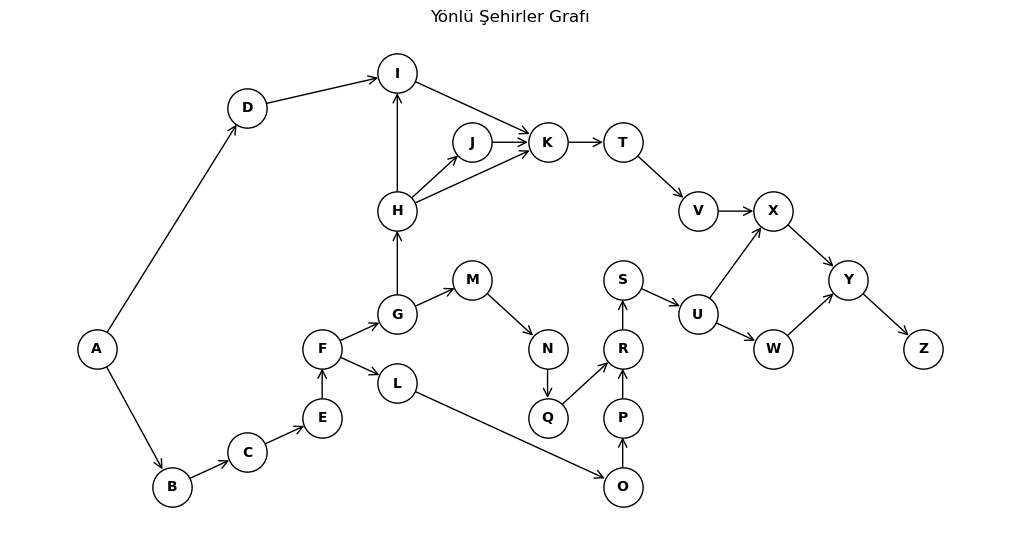

In [38]:
G = nx.DiGraph()

istasyonlar = {
    'A': 'Pekin', 'B': 'Xi’an', 'C': 'Lanzhou', 'D': 'Irkutsk','E': 'Urumqi', 'F': 'Alashankou','G': 'Altınkolat', 'H': 'Astana', 
    'I': 'Yekaterinburg', 'J': 'Kazan', 'K': 'Moskova','L': 'Taşkent', 'M': 'Aktau Limanı', 'N': 'Bakü', 'O': 'Tahran', 'P': 'Van',
    'Q': 'Kars', 'R': 'Ankara', 'S': 'Sofya', 'T': 'Minsk', 'U': 'Budapeşte','V': 'Warsaw', 'W': 'Strasbourg', 'X': 'Berlin', 'Y': 'Lille','Z': 'Londra'
}

dugumler = [
    ('A', 'D'), ('A', 'B'), ('B', 'C'), ('C', 'E'), ('D', 'I'),('E', 'F'), ('F', 'L'), ('F', 'G'), ('G', 'M'), ('G', 'H'),
    ('H', 'I'), ('H', 'J'), ('H', 'K'), ('I', 'K'), ('J', 'K'),('K', 'T'), ('L', 'O'), ('M', 'N'), ('N', 'Q'), ('O', 'P'),
    ('P', 'R'), ('Q', 'R'), ('R', 'S'), ('S', 'U'), ('T', 'V'),('U', 'X'), ('U', 'W'), ('V', 'X'), ('W', 'Y'), ('X', 'Y'),('Y', 'Z')
]

G.add_edges_from(dugumler)

dugumlerin_konumları = {
    'A': (0, -3), 'B': (1, -7), 'C': (2, -6), 'D': (2, 4), 'E': (3, -5),'F': (3, -3), 'G': (4, -2), 'H': (4, 1), 'I': (4, 5), 'J': (5, 3),
    'K': (6, 3), 'L': (4, -4), 'M': (5, -1), 'N': (6, -3), 'O': (7, -7),'P': (7, -5), 'Q': (6, -5), 'R': (7, -3), 'S': (7, -1), 'T': (7, 3),
    'U': (8, -2), 'V': (8, 1), 'W': (9, -3), 'X': (9, 1), 'Y': (10, -1),'Z': (11, -3)
}

plt.figure(figsize=(10, 5))

nx.draw(G, pos=dugumlerin_konumları, with_labels=True, node_color='white', edgecolors='black', node_size=800,
        font_size=10, font_color='black', edge_color='black', font_weight='bold',
        arrows=True, arrowstyle='->', arrowsize=15)

plt.title("Yönlü Şehirler Grafı")
plt.show()

# 2) Düğüm Ağırlıklarının Güncellenmesi

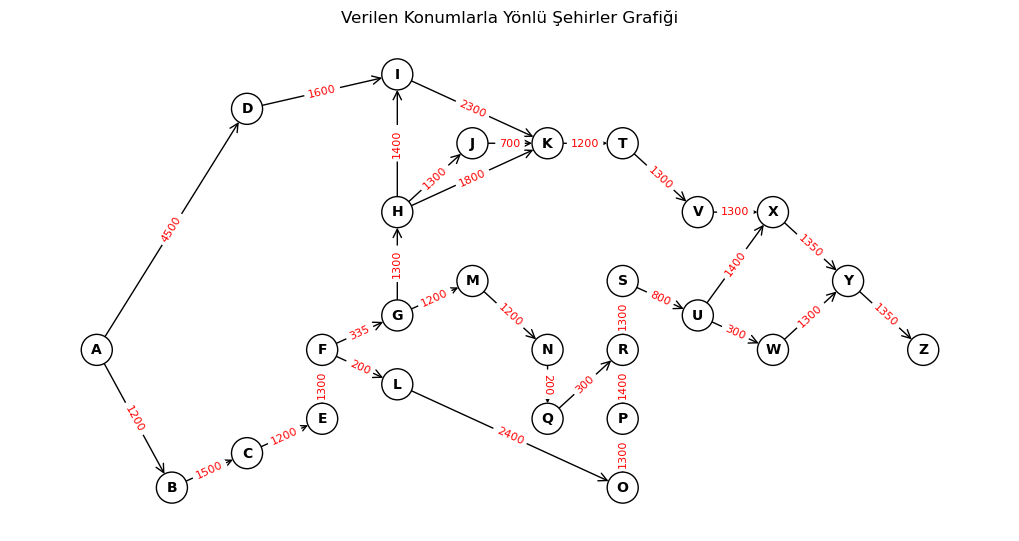

In [39]:
G = nx.DiGraph()

dugumler = [
    ('A', 'D', 4500), ('A', 'B', 1200), ('B', 'C', 1500), ('C', 'E', 1200), ('D', 'I', 1600),('E', 'F', 1300), ('F', 'L', 200), ('F', 'G', 335), 
    ('G', 'M', 1200), ('G', 'H', 1300),('H', 'I', 1400), ('H', 'J', 1300), ('H', 'K', 1800), ('I', 'K', 2300), ('J', 'K', 700),('K', 'T', 1200), 
    ('L', 'O', 2400), ('M', 'N', 1200), ('N', 'Q', 200), ('O', 'P', 1300),('P', 'R', 1400), ('Q', 'R', 300), ('R', 'S', 1300), ('S', 'U', 800), 
    ('T', 'V', 1300),('U', 'X', 1400), ('U', 'W', 300), ('V', 'X', 1300), ('W', 'Y', 1300), ('X', 'Y', 1350),('Y', 'Z', 1350)
]

G.add_weighted_edges_from(dugumler)

dugumlerin_konumları = {
    'A': (0, -3), 'B': (1, -7), 'C': (2, -6), 'D': (2, 4), 'E': (3, -5),'F': (3, -3), 'G': (4, -2), 'H': (4, 1), 'I': (4, 5), 'J': (5, 3),
    'K': (6, 3), 'L': (4, -4), 'M': (5, -1), 'N': (6, -3), 'O': (7, -7),'P': (7, -5), 'Q': (6, -5), 'R': (7, -3), 'S': (7, -1), 'T': (7, 3),
    'U': (8, -2), 'V': (8, 1), 'W': (9, -3), 'X': (9, 1), 'Y': (10, -1),'Z': (11, -3)
}

plt.figure(figsize=(10, 5))

node_colors = ['white' for node in G.nodes()]
edge_colors = ['black' for u, v in G.edges()]

nx.draw(G, pos=dugumlerin_konumları, with_labels=True, node_color=node_colors, edgecolors='black',
        node_size=500, font_size=10, font_color='black', edge_color=edge_colors, font_weight='bold',
        arrows=True, arrowstyle='->', arrowsize=15)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=dugumlerin_konumları, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("Verilen Konumlarla Yönlü Şehirler Grafiği")
plt.show()

# 3) Dijkstra Algoritmasının Oluşturulması

In [40]:
dugumler = [
    ('A', 'D', 4500), ('A', 'B', 1200), ('B', 'C', 1500), ('C', 'E', 1200), ('D', 'I', 1600),('E', 'F', 1300), ('F', 'L', 200), ('F', 'G', 335), 
    ('G', 'M', 1200), ('G', 'H', 1300),('H', 'I', 1400), ('H', 'J', 1300), ('H', 'K', 1800), ('I', 'K', 2300), ('J', 'K', 700),('K', 'T', 1200), 
    ('L', 'O', 2400), ('M', 'N', 1200), ('N', 'Q', 200), ('O', 'P', 1300),('P', 'R', 1400), ('Q', 'R', 300), ('R', 'S', 1300), ('S', 'U', 800), 
    ('T', 'V', 1300),('U', 'X', 1400), ('U', 'W', 300), ('V', 'X', 1300), ('W', 'Y', 1300), ('X', 'Y', 1350),('Y', 'Z', 1350)
]

G = nx.DiGraph()   
G.add_weighted_edges_from(dugumler)

def dijkstra(G, start, target):
    distances = {node: float('inf') for node in G.nodes}                    #Her düğümün başlangıç noktasına uzaklığını sonsuz olarak başlatılır.
    distances[start] = 0    
    priority_queue = [(0, start)]                                           # Öncelik kuyruğu tanımlanır ve başlangıç düğümünü kuyruk içine ekler.
    previous_nodes = {node: None for node in G.nodes}                       # Önceki düğümleri izlemek için bir sözlük oluşturulur.
    
    while priority_queue:                                                   # Kuyruk boşalana kadar döngü
        current_distance, current_node = heapq.heappop(priority_queue)      # Kuyruğun en küçük mesafeye sahip öğesi çıkarılır.
        
        if current_node == target:                                          # Her düğüme ulaşıldığında, yol ve mesafe döndürür
            path = []
            while previous_nodes[current_node] is not None:                 # Hedef düğümden başlayarak yol geri izlenir
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.append(start)                                              # Başlangıç düğümünü de ekleyip listeyi ters çevirerek doğru sırada döndürülür. 
            path.reverse()
            return path, distances[target]
        
        if current_distance > distances[current_node]:                      # Eğer bu düğümün uzaklığı daha önce hesaplanan mesafeden büyükse devam et
            continue
        
        for neighbor in G.neighbors(current_node):                          # Komşu düğümler üzerinden yolu güncellenir.
            weight = G[current_node][neighbor]['weight']                    # Mevcut düğümden komşuya olan mesafeyi alır.

            distance = current_distance + weight                            # Yeni mesafe hesaplanır.
             
            if distance < distances[neighbor]:  
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))        # Yeni mesafeyi öncelik kuyruğuna ekler.
    
    return None, float('inf')                                               # Eğer hedef düğüme ulaşılmamışsa, 'None' ve 'sonsuz' mesafe döndürür

en_kisa_yol, toplam_mesafe = dijkstra(G, 'A', 'Z')
en_kisa_yol_istasyonlar = [istasyonlar[node] for node in en_kisa_yol]
print("\nEn kısa yol:", en_kisa_yol)
print("\nToplam mesafe:", toplam_mesafe)
print("\nEn kısa yol:", ' → '.join(en_kisa_yol_istasyonlar))


En kısa yol: ['A', 'B', 'C', 'E', 'F', 'G', 'M', 'N', 'Q', 'R', 'S', 'U', 'W', 'Y', 'Z']

Toplam mesafe: 13485

En kısa yol: Pekin → Xi’an → Lanzhou → Urumqi → Alashankou → Altınkolat → Aktau Limanı → Bakü → Kars → Ankara → Sofya → Budapeşte → Strasbourg → Lille → Londra


# 4)  Düğüm Ağırlıklarına Göre Güzergahın Oluşturulması

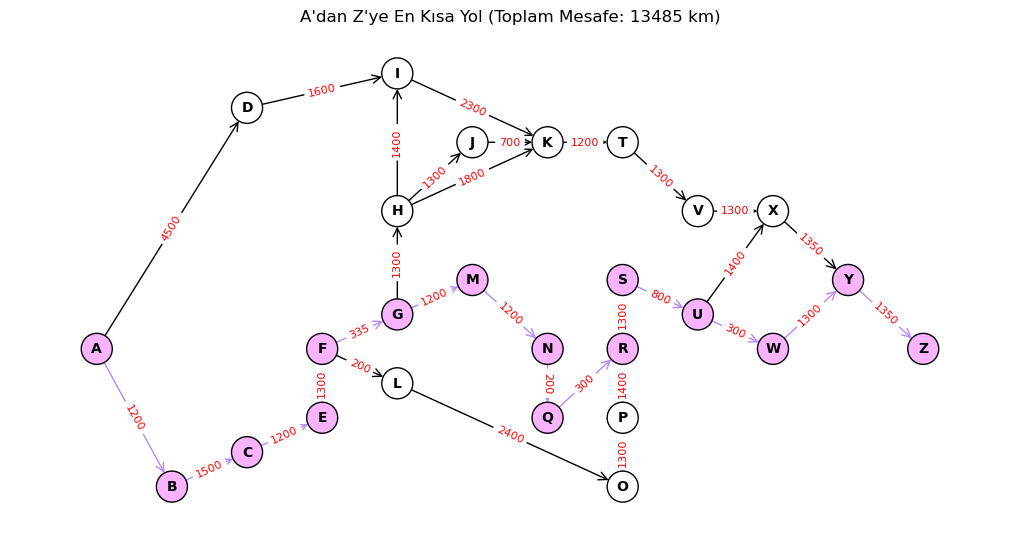

In [41]:
dugumlerin_konumları = {
    'A': (0, -3), 'B': (1, -7), 'C': (2, -6), 'D': (2, 4), 'E': (3, -5),'F': (3, -3), 'G': (4, -2), 'H': (4, 1), 'I': (4, 5), 'J': (5, 3),
    'K': (6, 3), 'L': (4, -4), 'M': (5, -1), 'N': (6, -3), 'O': (7, -7),'P': (7, -5), 'Q': (6, -5), 'R': (7, -3), 'S': (7, -1), 'T': (7, 3),
    'U': (8, -2), 'V': (8, 1), 'W': (9, -3), 'X': (9, 1), 'Y': (10, -1),'Z': (11, -3)
}

node_colors = ['#F9B3FF' if node in en_kisa_yol else 'white' for node in G.nodes()]
edge_colors = ['#B787FF' if (u, v) in zip(en_kisa_yol, en_kisa_yol[1:]) else 'black' for u, v in G.edges()]

plt.figure(figsize=(10, 5))
nx.draw(G, pos=dugumlerin_konumları, with_labels=True, node_color=node_colors, edgecolors='black', 
        node_size=500, font_size=10, font_color='black', edge_color=edge_colors, font_weight='bold', 
        arrows=True, arrowstyle='->', arrowsize=15)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=dugumlerin_konumları, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("A'dan Z'ye En Kısa Yol (Toplam Mesafe: {} km)".format(toplam_mesafe))
plt.show()

# 5) Bağlantılı Düğümlerin Birbirlerine Olan Uzaklıklarının Yazılması

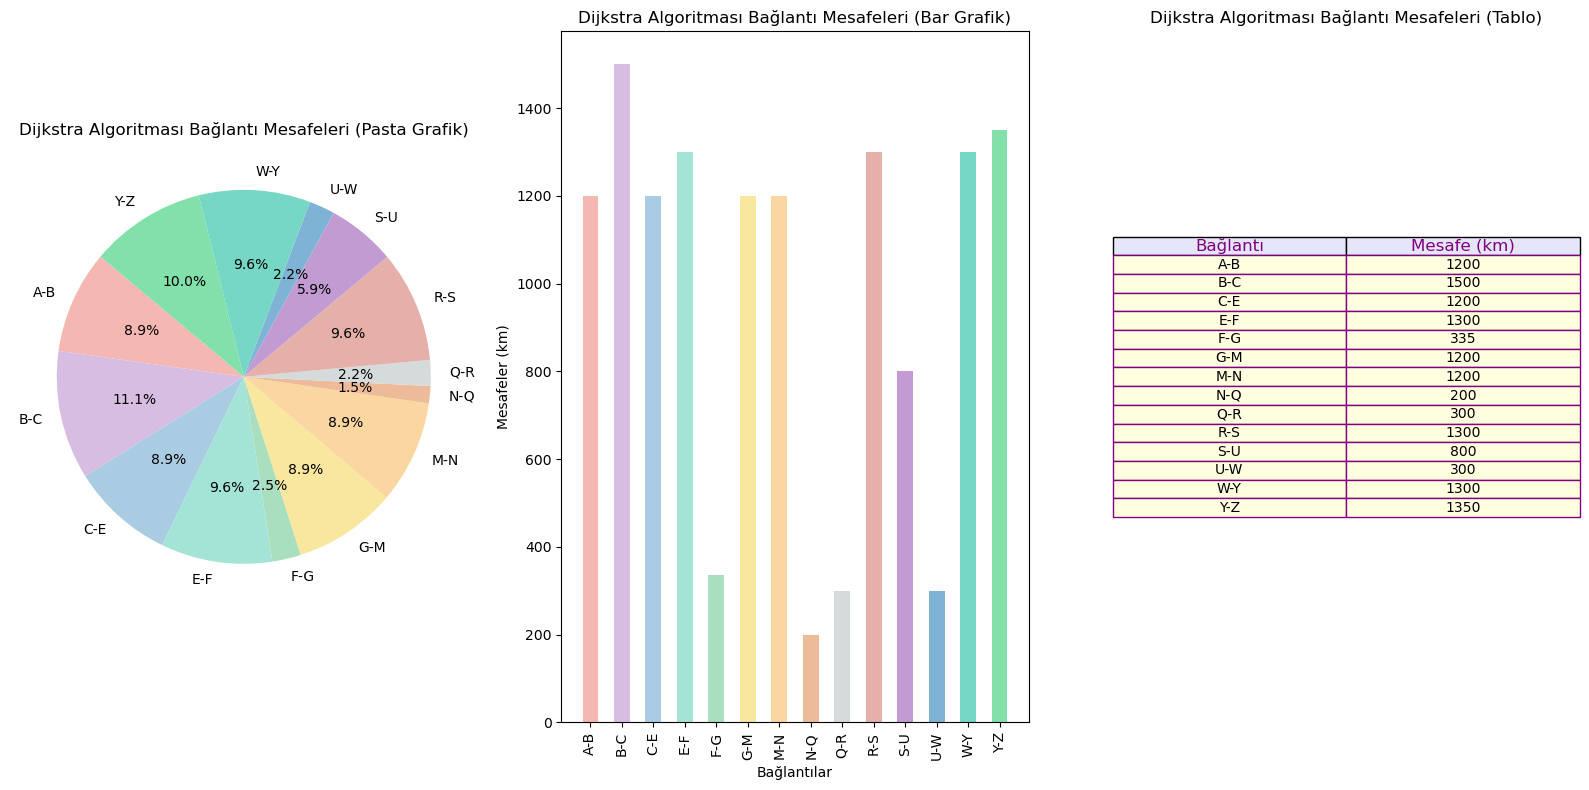

In [42]:
nodes = ['A-B', 'B-C', 'C-E', 'E-F', 'F-G', 'G-M', 'M-N', 'N-Q', 'Q-R', 'R-S', 'S-U', 'U-W', 'W-Y', 'Y-Z']
distances = [1200, 1500, 1200, 1300, 335, 1200, 1200, 200, 300, 1300, 800, 300, 1300, 1350]

colors = ['#f5b7b1', '#d7bde2', '#a9cce3', '#a3e4d7', '#a9dfbf', '#f9e79f', '#fad7a0', 
          '#edbb99', '#d5dbdb', '#e6b0aa', '#c39bd3', '#7fb3d5', '#76d7c4', '#82e0aa']

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.pie(distances, labels=nodes, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Dijkstra Algoritması Bağlantı Mesafeleri (Pasta Grafik)")

plt.subplot(1, 3, 2)
plt.bar(nodes, distances, color=colors, width=0.5)
plt.title("Dijkstra Algoritması Bağlantı Mesafeleri (Bar Grafik)")
plt.xlabel("Bağlantılar")
plt.ylabel("Mesafeler (km)")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
table_data = [[nodes[i], distances[i]] for i in range(len(nodes))]
column_labels = ["Bağlantı", "Mesafe (km)"]
table = plt.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center', colColours=["lavender", "lavender"])
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.axis("off")
plt.title("Dijkstra Algoritması Bağlantı Mesafeleri (Tablo)")

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(color='purple')
        cell.set_facecolor('lavender')
    else:
        cell.set_fontsize(10)
        cell.set_facecolor('lightyellow')
        cell.set_edgecolor('purple')

plt.tight_layout()
plt.show()

# 6) Sonucun Yazdırılması

In [43]:
en_kisa_yol, toplam_mesafe = dijkstra(G, 'A', 'Z')
en_kisa_yol_istasyonlar = [istasyonlar[node] for node in en_kisa_yol]

print("\nEn kısa yol:", en_kisa_yol)
print("\nToplam mesafe:", toplam_mesafe)
print("\nEn kısa yol:", ' → '.join(en_kisa_yol_istasyonlar))


En kısa yol: ['A', 'B', 'C', 'E', 'F', 'G', 'M', 'N', 'Q', 'R', 'S', 'U', 'W', 'Y', 'Z']

Toplam mesafe: 13485

En kısa yol: Pekin → Xi’an → Lanzhou → Urumqi → Alashankou → Altınkolat → Aktau Limanı → Bakü → Kars → Ankara → Sofya → Budapeşte → Strasbourg → Lille → Londra


# NİSA KOPUZ - 220710015
# HASRET İŞLER - 220710017
# DEFNE GÖDELEKOĞLU - 220710071